Content:

1. [Loading Data and Explanation of Features](#1)
2. [Line Charts](#2)
3. [Scatter Charts](#3)
4. [Bar Chart](#4)
5. [Pie Chart](#5)
6. [Bubble Chart](#6)
7. [Histogram](#7)
8. [Word Cloud](#8)
9. [Box Plot](#9)
10. [Scatter Plot Matrix](#10)
11. [Inset Plots](#11)
12. [3D Scatter Plot with Colorscaling](#12)
13. [Multiple Subplots](#13)

In [1]:
pip install plotly==3.10.0

     |████████████████████████████████| 41.5 MB 262 kB/s 
ERROR: plotly-express 0.4.1 has requirement plotly>=4.1.0, but you'll have plotly 3.10.0 which is incompatible.
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
ERROR: catalyst 20.3.3 has requirement plotly>=4.1.0, but you'll have plotly 3.10.0 which is incompatible.
  Attempting uninstall: plotly
    Found existing installation: plotly 4.5.4
    Uninstalling plotly-4.5.4:
      Successfully uninstalled plotly-4.5.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt

from wordcloud import WordCloud

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


<a id='1' ></a>
# 1. Loading Data and Explanation of Features

In [3]:
timesData=pd.read_csv('/kaggle/input/world-university-rankings/timesData.csv')

In [4]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [5]:
timesData.iloc[1000:1010]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1000,351-400,University of Wyoming,United States of America,18.6,28.1,24.2,47.5,30.9,-,NaN,NaN,NaN,NaN,2013
1001,351-400,Waseda University,Japan,28.9,32.8,21.3,37.8,30.8,-,"52,316",16.9,8%,35 : 65,2013
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014
1005,4,Stanford University,United States of America,94.7,68.0,96.8,99.1,61.3,93.8,"15,596",7.8,22%,42 : 58,2014
1006,5,Massachusetts Institute of Technology,United States of America,92.9,82.0,89.0,100.0,94.3,93.0,"11,074",9.0,33%,37 : 63,2014
1007,6,Princeton University,United States of America,89.9,59.6,97.6,99.7,80.5,92.7,"7,929",8.4,27%,45 : 55,2014
1008,7,University of Cambridge,United Kingdom,90.6,86.7,95.3,95.7,52.8,92.3,"18,812",11.8,34%,46 : 54,2014
1009,8,"University of California, Berkeley",United States of America,83.2,57.3,97.5,99.3,59.5,89.8,"36,186",16.4,15%,50 : 50,2014


<a id='2' ></a>
# 2. Line Charts

Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities
* Import graph_objs as go
* Creating traces
  * x = x axis
  * y = y axis
  * mode = type of plot like marker, line or line + markers
  * name = name of the plots
  * marker = marker is used with dictionary.
    * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
  * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
  * title = title of layout
  * x axis = it is dictionary
    * title = label of x axis
    * ticklen = length of x axis ticks
    * zeroline = showing zero line or not
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [6]:
#DATAI TEAM
# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [7]:
#BENIM YAZDIGIM 2
df=timesData.iloc[0:100]
import plotly.graph_objs as go

#trace1
trace1=go.Scatter(
    x=df.world_rank,
    y=df.citations,
    mode='lines',
    name='Citations',
    marker=dict(color='rgba(16,112,2,0.8)'),
    text=df.university_name
)
#trace2
trace2=go.Scatter(
    x=df.world_rank,
    y=df.teaching,
    mode='lines+markers',
    name='Teaching',
    marker=dict(color='rgba(80,26,80,0.8)', size=10),
    text=df.university_name
)

data=[trace1,trace2]
layout=dict(
    title="Citations and Teaching vs World Rank of Top 100 Universities",
    xaxis=dict(title='World Rank', ticklen=5, zeroline=False)
)

fig=dict(data=data, layout=layout)
iplot(fig)

<a id='3' ></a>
# 3. Scatter Charts

In [8]:
timesData["year"].describe

<bound method NDFrame.describe of 0       2011
1       2011
2       2011
3       2011
4       2011
        ... 
2598    2016
2599    2016
2600    2016
2601    2016
2602    2016
Name: year, Length: 2603, dtype: int64>

In [9]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [10]:
df2014=timesData[timesData.year==2014].iloc[0:100]
df2015=timesData[timesData.year==2015].iloc[0:100]
df2016=timesData[timesData.year==2016].iloc[0:100]

In [11]:
#traces
trace1=go.Scatter(
    x=df2014.world_rank,
    y=df2014.citations,
    name='2014',
    mode='markers',
    marker=dict(color='rgba(100,120,200,0.7)', size=9),
    text=df2014.university_name
)
trace2=go.Scatter(
    x=df2015.world_rank,
    y=df2015.citations,
    name='2015',
    mode='markers',
    marker=dict(color='rgba(20,150,180,0.7)', size=8),
    text=df2015.university_name
)
trace3=go.Scatter(
    x=df2016.world_rank,
    y=df2016.citations,
    name='2016',
    mode='markers',
    marker=dict(color='rgba(240,10,10,0.7)', size=7),
    text=df2016.university_name
)

data=[trace1,trace2,trace3]
layout=dict(
    title='Comparison of Citations of Top 100 Universities of Years 2014, 2015, 2016',
    xaxis=dict(title='World Rank', ticklen=9, zeroline=False),
    yaxis=dict(title='Citations', ticklen=9, zeroline=False)
)

fig=dict(data=data, layout=layout)
iplot(fig)

<a id='4' ></a>
# 4. Bar Chart

First Bar Charts Example: citations and teaching of top 3 universities in 2014 (style1)

In [12]:
df2014=timesData[timesData.year==2014].iloc[0:3]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [13]:
trace1=go.Bar(
    x=df2014.university_name,
    y=df2014.citations,
    name="Citations",
    marker=dict(color='rgba(100,255,255,0.8)', line=dict(color='rgba(0,0,0,1)', width=1.5)),
    text=df2014.country
)
trace2=go.Bar(
    x=df2014.university_name,
    y=df2014.teaching,
    name='Teachings',
    marker=dict(color='rgba(255,255,128,0.8)', line=dict(color='rgba(0,0,0,1)', width=1.5)),
    text=df2014.country
)
data=[trace1,trace2]
layout=go.Layout(barmode='group')
fig=go.Figure(data=data, layout=layout)
iplot(fig)

In [14]:
import plotly.graph_objs as go

trace1={
    'x':df2014.university_name,
    'y':df2014.citations,
    'name':'Citations',
    'type':'bar',
    'marker':{'color':'rgba(255,100,255,0.8)', 'line':{'color':'rgba(0,0,0,1)', 'width':1.5}},
    'text':df2014.university_name
}
trace2={
    'x':df2014.university_name,
    'y':df2014.teaching,
    'name':'Teachings',
    'type':'bar',
    'marker':{'color':'rgba(100,255,255,0.8)'},
    'text':df2014.university_name
}
data=[trace1,trace2]
layout={
    'title':'Citations and Teachings of Top3 Universities of 2014',
    'barmode':'relative',
    'xaxis':{'title':'Top 3 Universities'}
}
fig={'data':data, 'layout':layout}
iplot(fig)

<a id='5' ></a>
# 5. Pie Chart

Students rate of top 7 universities in 2016

In [15]:
df7=timesData[timesData.year==2016].iloc[:7]
df7

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45 : 55,2016


In [16]:
import plotly.graph_objs as go

number_list=[int(each.replace(',','')) for each in df7.num_students]

trace=go.Pie(
    values=number_list,
    labels=df7.university_name,
    hoverinfo='label+percent+value',
    marker=dict(colors=['yellow','green','blue','cyan','brown','orange','black']),
    hole=0.3,
    type='pie',
    domain=dict(x=[0,0.5])
)
data=[trace]
layout=go.Layout(
    title='Number of Students of Top 7 Universities in 2016',
    annotations=[
        dict(
            text='Number of Students', x=0.15, y=1.1, showarrow=False, font_size=20
        )
    ]
)
fig=go.Figure(data, layout)
iplot(fig)



In [17]:
import plotly.graph_objs as go

df2016pie=df2016.iloc[0:7,:]
pie_list=[int(each.replace(',',''))  for each in df2016pie.num_students]

fig={
    'data':[
        {
            'values':pie_list,
            'labels':df2016pie.university_name,
            'domain':{'x':[0,.5]},
            'name':'number of students',
            'hoverinfo':'label+percent+name',
            'hole':0.3,
            'type':'pie'
        }
    ],
    'layout':{
        'title':'Number of Students of Top 7 Universities in 2016',
        'annotations':[
            {
                'font':{'size':20},
                'showarrow':False,
                'text':'Number of Students',
                'x':0.15,
                'y':1.1
            }
        ]
    }
}
iplot(fig)


<a id='6' ></a>
# 6. Bubble Chart

Bubble Charts Example: University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

In [18]:
df2016_bubble=timesData[timesData.year==2016].iloc[:20]
df2016_bubble

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016
1808,6,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,"20,152",8.9,25%,NaN,2016
1809,7,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,"7,929",8.4,27%,45 : 55,2016
1810,8,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,"15,060",11.7,51%,37 : 63,2016
1811,9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,"18,178",14.7,37%,31 : 69,2016
1812,10,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,"14,221",6.9,21%,42 : 58,2016


In [19]:
import plotly.graph_objs as go

num_of_students=[float(each.replace(',','.')) for each in df2016_bubble.num_students]
color_international=[float(each) for each in df2016_bubble.international]

data=[
    {
        'x':df2016_bubble.world_rank,
        'y':df2016_bubble.teaching,
        'mode':'markers',
        'marker':{
            'color':color_international,
            'size':num_of_students,
            'showscale':True
        },
        'text':df2016_bubble.university_name
    }
]
iplot(data)

<a id='7' ></a>
# 7. Histogram

Student-Staff ratio of 2011 and 2012

In [20]:
x2011=timesData.student_staff_ratio[timesData.year==2011]
x2012=timesData.student_staff_ratio[timesData.year==2012]

import plotly.graph_objs as go

trace1=go.Histogram(
    x=x2011,
    name='2011',
    opacity=0.75,
    marker=dict(color='rgb(255,100,255)')
)
trace2=go.Histogram(
    x=x2012,
    name='2012',
    opacity=0.75,
    marker=dict(color='rgb(100,255,255)')
)
data=[trace1,trace2]
layout=go.Layout(
    title='Student-Staff Ratio of 2011 and 2012',
    barmode='overlay',
    xaxis=dict(title='Student-Staff Ratio'),
    yaxis=dict(title='Count')
)
fig=go.Figure(data,layout)
iplot(fig)

<a id='8' ></a>
# 8. Word Cloud

Most repeated countries in top 100 universities data of 2011

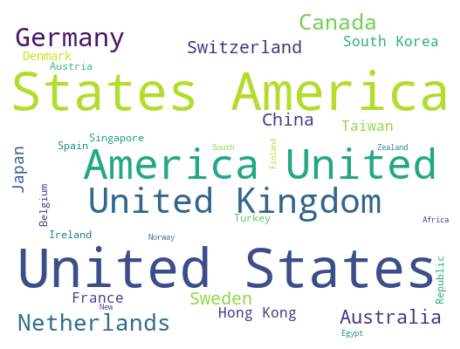

In [21]:
repeat_2011=timesData.country[timesData.year==2011]

plt.subplots(figsize=(8,8))

wordcloud=WordCloud(
    background_color='white',
    width=512,
    height=384
).generate(" ".join(repeat_2011))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id='9' ></a>
# 9. Box Plot

Total Score and Research points of the universities in 2015

In [22]:
x2015=timesData[timesData.year==2015].iloc[:100]

trace0=go.Box(
    y=x2015.total_score,
    name='Total Score',
    marker_color='blue'
)
trace1=go.Box(
    y=x2015.research,
    name='Research',
    marker_color='green'
)
data=[trace0,trace1]
iplot(data)

<a id='10' ></a>
# 10. Scatter Plot Matrix

In [23]:
timesData.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [24]:
x2015=timesData[timesData.year==2015]
scatter_2015=x2015.loc[:,["international","research","total_score"]]
scatter_2015["index"]=np.arange(1,len(scatter_2015)+1)

import plotly.figure_factory as ff

fig=ff.create_scatterplotmatrix(
    df=scatter_2015,
    diag='box',
    width=600,
    height=600,
    colormap='Portland',
    colormap_type='cat',
    index="index"
)
iplot(fig)

<a id='11' ></a>
# 11. Inset Plots

In [25]:
dataframe=timesData[timesData.year==2015]

In [26]:
dataframe=timesData[timesData.year==2015]
trace1=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name='Teaching',
    marker_color='blue',
    text=dataframe.university_name
)
trace2=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    name='Income',
    marker_color='red',
    xaxis='x2',
    yaxis='y2',
    text=dataframe.university_name
)
data=[trace1,trace2]
layout=go.Layout(
    xaxis2=dict(domain=[0.6,0.95], anchor='y2'),
    yaxis2=dict(domain=[0.6,0.95], anchor='x2'),
    title='Income and Teaching vs World Rank of Universities'
)
fig=dict(data=data,layout=layout)
iplot(fig)

<a id='12' ></a>
# 12. 3D Scatter Plot with Colorscaling

In [27]:
dataframe=dataframe.iloc[:200]
trace=go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        color=[int(each) for each in dataframe.world_rank],
        colorscale='Viridis',
        size=10        # We can add 5th dimension by using size.
    )
)
data=[trace]
layout=go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig=dict(data=data,layout=layout)
iplot(fig)

In [28]:
# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)],
layout=go.Layout(margin=dict(l=0, r=0, b=0, t=0))   # tight layout
)

fig.show()

<a id='13' ></a>
# 13. Multiple Subplots

In [29]:
research, citations, income, total_score

NameError: name 'research' is not defined

In [30]:
trace1=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name='Research',
    marker_color='blue',
    text=dataframe.university_name
)
trace2=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    name='Citations',
    marker_color='red',
    text=dataframe.university_name,
    xaxis='x2',
    yaxis='y2'
)
trace3=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    name='Income',
    marker_color='yellow',
    text=dataframe.university_name,
    xaxis='x3',
    yaxis='y3'
)
trace4=go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    name='Total_score',
    marker_color='green',
    text=dataframe.university_name,
    xaxis='x4',
    yaxis='y4'
)
data=[trace1,trace2,trace3,trace4]
layout=go.Layout(
    xaxis=dict(domain=[0.05,0.50]),
    yaxis=dict(domain=[0.05,0.50]),
    xaxis2=dict(domain=[0.55,1], anchor='y2'),
    yaxis2=dict(domain=[0.05,0.50], anchor='x2'),
    xaxis3=dict(domain=[0.05,0.50], anchor='y3'),
    yaxis3=dict(domain=[0.55,1], anchor='x3'),
    xaxis4=dict(domain=[0.55,1], anchor='y4'),
    yaxis4=dict(domain=[0.55,1], anchor='x4'),
)
fig=dict(data=data,layout=layout)
iplot(fig)